# Support Vector Machine (SVM)

## 1. Introduction

### Related Work

- Li, S., Shiue, W., & Huang, M. (2006). The evaluation of consumer loans using support vector machines. Expert Systems with Applications, 30(4), 772–782. https://doi.org/10.1016/j.eswa.2005.07.041
- Putri, N. H., Fatekurohman, M., & Tirta, I. M. (2021). Credit risk analysis using support vector machines algorithm. Journal of Physics: Conference Series, 1836(1), 012039. https://doi.org/10.1088/1742-6596/1836/1/012039

Support Vector Machines (SVM) have been extensively applied in the domain of credit risk analysis due to their utility in handling high-dimensional data and their effectiveness in classification tasks involving both linear and non-linear boundaries. One of the earlier works by Li et al. (2006) demonstrated the application of SVM in evaluating consumer loan applications, comparing it against traditional statistical techniques such as logistic regression and MLP. The study found that SVM provided superior predictive performance, particularly in scenarios with complex data distributions and class imbalance issues, which are common in credit datasets.

In recent years, Putri et al. (2021) investigated the use of SVM for credit risk prediction within a cooperative financial institution in Indonesia. Their work emphasized the effectiveness of kernel-based transformations in enhancing class separability, especially when working with non-linearly separable credit data. They concluded that SVM models with appropriate kernel selection can significantly improve classification accuracy for credit approval decisions.

While these studies highlight the potential of SVM in financial applications, our work differs in several key aspects. Firstly, we applied SVM to a credit dataset that has undergone extensive preprocessing, including normalisation, minority oversampling, and feature selection. Secondly, unlike prior studies that relied solely on default accuracy metrics, we evaluate our SVM models using a comprehensive myriad of performance measures such as ROC AUC, Precision-Recall AUC, and class-specific recall to better reflect the cost of false classifications in real-world credit approval scenarios. Finally, we explore the impact of hyperparameter and decision threshold tuning and also comparing performance across multiple SVM kernels, thereby offering a more complete analysis of SVM's applicability to credit approval prediction.

### Justification

**Why SVM is suitable for credit card approval prediction**

SVM is a supervised machine learning algorithm that is suitable for classification tasks. SVM works by finding an optimal hyperplane that best separates data points of different classes. In cases where the data is not linearly separable, the SVM model can also project the features into a higher-dimensional space using kernel functions (such as polynomial or gaussian kernels), enabling the model to find complex and non-linear decision boundaries. The algorithm focuses on maximising the margin between classes, ensuring that the classes are well separated, this enhancing generalisability and reduces overfitting, especially in high-dimensional datasets.

Given the goal of our prediction task, which is to determine whether a credit card application should be approved or rejected, SVM is a highly suitable model for such binary classification task. Credit approval datasets often involve non-linear relationships between features such as income, age, employment status, and property ownership. SVM’s ability to handle non-linearly separable data via kernel tricks make it an ideal candidate for this problem. Additionally, SVM performs well even in cases when the number of features is high relative to the number of samples, which is often observed in structured financial data.

Hence, our approach is technically justifiable as we have applied SVM with kernel selection and hyperparameter tuning to adapt to the characteristics of our dataset. We also go beyond standard accuracy metrics to include recall, ROC AUC, and PR AUC, which are more informative in imbalanced classification scenarios present in our dataset. These measures are crucial since minimising false classifications (such as incorrectly rejecting eligible applicants or incorrectly approving risky applicants) is particularly important in the context of fair and effective credit approval.

## 2. Model Implementation

#### Import Packages

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [2]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [3]:
train_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,TYPE
0,1,1,0,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.106810,0,1
1,0,0,1,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.541205,0,1
2,0,0,0,-0.579661,-0.242521,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,0,Core staff,-0.217680,-0.543892,1,1
3,0,0,0,-0.579661,0.376413,Pensioner,Higher education,Married,House / apartment,1,0,0,1,Unknown,-0.217680,1.019931,0,1
4,0,1,1,0.767400,0.730090,State servant,Higher education,Married,House / apartment,1,0,0,0,Managers,0.879204,-0.196376,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0,0,0,3.461523,-1.138040,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Sales staff,3.072971,0.131754,1,0
57842,1,0,0,0.767400,-0.270756,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Drivers,-1.314564,-0.029918,1,0
57843,1,0,1,-0.579661,0.383428,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Laborers,-1.314564,-1.411993,1,0
57844,0,0,0,-0.579661,-0.707572,Pensioner,Incomplete higher,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,1.368561,0,0


In [4]:
test_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,TYPE
0,1,0,0,0.767400,0.509042,Commercial associate,Secondary / secondary special,Single / not married,Co-op apartment,1,0,0,0,Security staff,-0.217680,-1.673319,1,1
1,0,0,1,-0.579661,0.155365,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,Unknown,-1.314564,1.367447,0,1
2,0,0,1,0.767400,-0.507779,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Laborers,0.879204,-1.412682,1,1
3,0,0,1,-0.579661,-0.596198,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0,1
4,0,0,1,-0.579661,-1.170923,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,1,1,1,-0.579661,1.923749,Working,Higher education,Separated,House / apartment,1,1,1,0,Managers,-1.314564,-0.283255,1,1
7288,0,0,1,-0.579661,-0.949875,State servant,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,-0.370134,1,1
7289,0,0,0,-0.579661,-0.949875,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,1,0,Unknown,-1.314564,1.367447,0,1
7290,0,0,0,2.114462,-0.286731,State servant,Higher education,Married,House / apartment,1,0,0,0,Medicine staff,1.976088,-0.804529,1,1


In [5]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

### Data Processing

One-hot encoding is needed for categorical variables because SVM cannot work directly with non-numeric data. One-hot encoding transforms categorical values into a binary matrix, allowing each category to be represented as a separate feature. This prevents the algorithm from assuming any ordinal relationship between categories and ensures fair margin computation in an algorithms like SVM.

In [6]:
# One-hot encoding for the categorical features
categorical_cols = [5, 6, 7, 8, 13]  # Income type, Education, Marital status, Housing, Occupation
numeric_cols = [i for i in range(X_train.shape[1]) if i not in categorical_cols]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train.iloc[:, categorical_cols])
X_test_cat = encoder.transform(X_test.iloc[:, categorical_cols])

encoded_feature_names = encoder.get_feature_names_out(X_train.columns[categorical_cols])
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_feature_names, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_feature_names, index=X_test.index)

In [7]:
X_train_cat_df

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57842,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57843,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57844,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X_test_cat_df

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7290,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Merge back into dataframe
X_train_num_df = X_train.iloc[:, numeric_cols].reset_index(drop=True)
X_test_num_df = X_test.iloc[:, numeric_cols].reset_index(drop=True)

X_train_final = pd.concat([X_train_cat_df.reset_index(drop=True), X_train_num_df], axis=1)
X_test_final = pd.concat([X_test_cat_df.reset_index(drop=True), X_test_num_df], axis=1)

In [10]:
X_train_final

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.728827,1,0,0,0,-0.217680,1.106810,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.728827,1,0,0,0,-0.217680,1.541205,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.242521,1,1,0,0,-0.217680,-0.543892,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.579661,0.376413,1,0,0,1,-0.217680,1.019931,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0.767400,0.730090,1,0,0,0,0.879204,-0.196376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3.461523,-1.138040,1,1,0,0,3.072971,0.131754,1
57842,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.767400,-0.270756,1,0,0,0,-1.314564,-0.029918,1
57843,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,0.383428,1,0,0,1,-1.314564,-1.411993,1
57844,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,-0.579661,-0.707572,1,0,0,0,-1.314564,1.368561,0


In [11]:
X_test_final

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.767400,0.509042,1,0,0,0,-0.217680,-1.673319,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,0.155365,1,0,0,0,-1.314564,1.367447,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0.767400,-0.507779,1,1,1,0,0.879204,-1.412682,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.596198,1,0,0,0,-0.217680,1.454326,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,-1.170923,1,0,0,0,-0.217680,1.454326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,1.923749,1,1,1,0,-1.314564,-0.283255,1
7288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.949875,1,0,0,0,-1.314564,-0.370134,1
7289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.949875,1,0,1,0,-1.314564,1.367447,0
7290,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,2.114462,-0.286731,1,0,0,0,1.976088,-0.804529,1


### Base Model for Support Vector Machine (SVM) - Linear Kernel

In [12]:
# Normal SVM with no hyperparameter tuning and linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_final, y_train)
y_pred_linear = svm_linear.predict(X_test_final)
y_scores_linear = svm_linear.decision_function(X_test_final)

print("Test Accuracy (Linear):", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Test Accuracy (Linear): 0.5921557871640154

Confusion Matrix:
 [[  25   35]
 [2939 4293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.42      0.02        60
           1       0.99      0.59      0.74      7232

    accuracy                           0.59      7292
   macro avg       0.50      0.51      0.38      7292
weighted avg       0.98      0.59      0.74      7292



In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_linear).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred_linear, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred_linear, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred_linear, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred_linear, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_linear, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_linear, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred_linear, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_linear, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_linear, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_scores_linear))
print("PR AUC:", average_precision_score(y_test, y_scores_linear))

=== Confusion Matrix Derived Metrics ===
TPR: 0.5936, TNR: 0.4167, FPR: 0.5833, FNR: 0.4064

=== Micro-Averaged Metrics ===
Precision (micro): 0.5921557871640154
Recall (micro): 0.5921557871640154
F1 Score (micro): 0.5921557871640154

=== Macro-Averaged Metrics ===
Precision (macro): 0.500173835876482
Recall (macro): 0.5051391961651918
F1 Score (macro): 0.37963397777411617

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9838208700657701
Recall (weighted): 0.5921557871640154
F1 Score (weighted): 0.736758255408689

=== Threshold-Based Metrics ===
ROC AUC: 0.5478544432153392
PR AUC: 0.9934999560133313


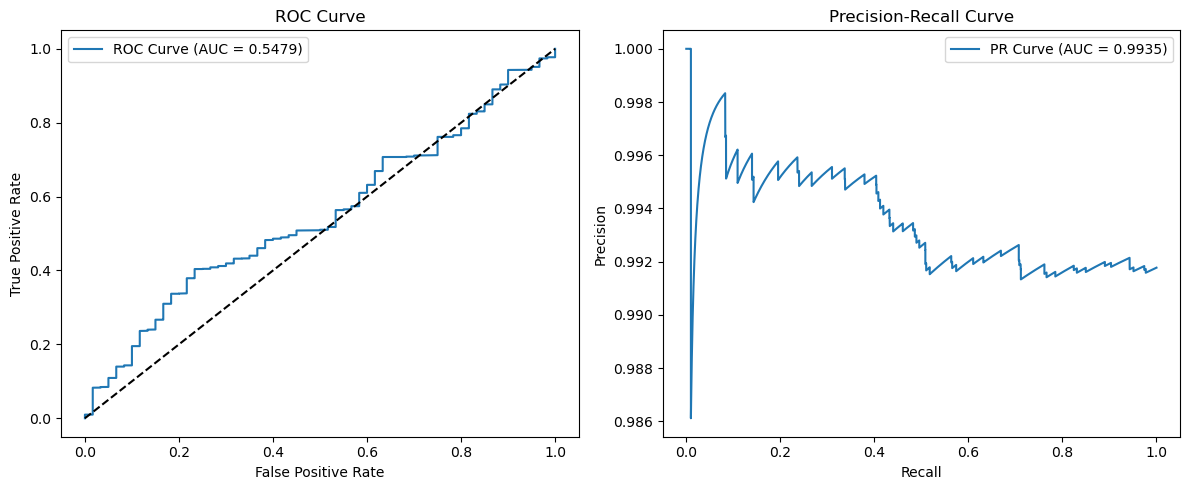

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_scores_linear)
precision, recall, _ = precision_recall_curve(y_test, y_scores_linear)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_scores_linear):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_scores_linear):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.5922
    - Slightly better than random guessing, suggesting the model has picked up some patterns in the data. However, due to the severe class imbalance where class 1 (good clients) dominates, this metric can be misleading
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.01
            - Only 1% of the predicted class 0s were actually class 0, showing that the model is highly unreliable when predicting class 0
        - Recall: 0.42
            - The model captured 42% of actual bad clients, which shows some detection ability, but with very large number of false positives.
        - F1-Score: 0.02
            - Shows very poor balance between precision and recall. This low F1 score also reflects how poorly the model handles class 0
    - Class 1 (Good Client):
        - Precision: 0.99
            - Nearly all predicted class 1s are correct showing that the model has strong reliability in majority class predictions
        - Recall: 0.59
            - The model misses 41% of actual good clients, leading to a significant number of false negatives
        - F1-Score: 0.74
            - Shows a good balance between high precision and moderate recall
3. Averaged-Metrics
    - Micro-Average (Each instance has the same weight regardless of class): All metrics = 0.5922
        - In binary classification, micro-averaged precision, recall, and F1 score match the accuracy, as they treat all instances equally. This is useful when the dataset is imbalanced, but does not reveal class-wise performance.
    - Macro-Average (Each class has equal weight): Precision: 0.50, Recall: 0.51, F1 Score: 0.38
        - Reflects the average performance across both classes equally. The large drop in macro-average F1 compared to micro-average F1 shows the model performs well in one class but poorly on the other
    - Weighted-Average (Each class is weighted by its frequency): Precision: 0.98, Recall: 0.59, F1 Score: 0.74
        - Strong metrics due to domination by class 1. High values obscure how poorly class 0 is handled. This metric is helpful to show model performance on the overall dataset, but hides minority issues
4. AUC-ROC: 0.5479
    - The value is slightly above 0.5, indicating very limited ability to distinguish between the two classes. This suggests the model’s discriminative power is weak, hence performance is only slightly better than random guessing.
5. PR-AUC: 0.9935
    - Extremely high value showing high precision over different recall values
6. Confusion Matrix Derived Metrics: TPR: 0.5936, TNR: 0.4167, FPR: 0.5833, FNR: 0.4064
    - These metrics highlight that while the model is modestly effective at identifying good clients, its ability to correctly identify bad clients is poor, with high false positive and false negative rates

**Why is the model performing poorly**

The poor performance of the linear SVM model can be attributed to likely the inappropriate choice of kernel and the mathematical implications of the regularization parameter C. SVM seeks to find an optimal hyperplane that maximises the margin between classes while minimising classification error. With a linear kernel, the model assumes that the data is linearly separable, which is a rather unrealistic assumption in credit approval problems as these problems typically involve complex, non-linear relationships between features such as income, employment status and property ownership. As a result, the linear model fails to find a boundary that separates the classes effectively, especially the minority class (bad clients). This is supported by the evaluation metrics: the precision for class 0 is only 0.01, and the F1 score is 0.02, indicating that the model rarely makes correct predictions for minority instances. The decision boundary formed by the linear SVM likely cuts across the majority class in a way that misclassifies the minority class due to the geometric inflexibility of a straight-line separator.

Furthermore, the model was trained with C = 1.0, which balances the trade-off between maximizing the margin and minimizing classification errors. C is the regularization parameter in the hinge loss objective of SVM. A lower value of C results in a softer margin, meaning the model is more tolerant of misclassified points in favor of a larger margin. This flexibility results in increased variance thus reducing oerall recall.

**Further Improvements**
- Using a non-linear kernel (such as Gaussian or polynomial) 
- Tuning the values of the hyperparameter C values via cross-validation to better control the bias-variance trade-off

### Hyperparameter Tuning for SVM with Linear Kernel

In [15]:
C_values = [0.01, 0.1, 1, 5, 10]
cv_scores = []

# Perform 5-fold cross-validation for each C
for c in C_values:
    model = SVC(kernel='linear', C=c)
    scores = cross_val_score(model, X_train_final, y_train.values.ravel(), cv=5, scoring='accuracy')
    mean_score = scores.mean()
    cv_scores.append(mean_score)
    print(f"C = {c}, Cross-Validation Accuracy = {mean_score:.4f}")

C = 0.01, Cross-Validation Accuracy = 0.6836
C = 0.1, Cross-Validation Accuracy = 0.6864
C = 1, Cross-Validation Accuracy = 0.6869
C = 5, Cross-Validation Accuracy = 0.6868
C = 10, Cross-Validation Accuracy = 0.6869


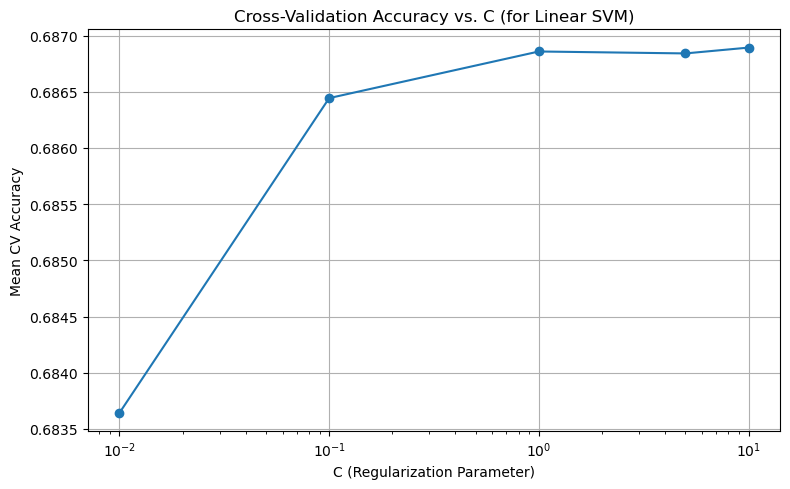

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(C_values, cv_scores, marker='o')
plt.xscale('log')
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Mean CV Accuracy")
plt.title("Cross-Validation Accuracy vs. C (for Linear SVM)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis**

From the cross-validation results, it is observed that varying the regularisation parameter C from 0.01 to 10 does not lead to any significant improvement in model performance. The cross-validation accuracy remains fairly consistent around 0.6869 across all values. This suggests that adjusting the strength of the penalty for misclassification (the softness or strictness of the margin) does not sufficiently address the core limitations of the linear model in this case. The relatively flat performance curve across different C values reinforces the earlier conclusion that the linear kernel is fundamentally insufficient to capture the complex, non-linear patterns present in the credit card approval dataset. A higher level, non-linear kernel, such as Gaussian or polynomial, is likely needed to achieve better performance.

### SVM with Kernel Trick (Gaussian Kernel, Polynomial Kernel, Sigmoid Kernel)

In [17]:
other_kernels = ['linear', 'rbf', 'sigmoid']

kernel_labels = []
cv_scores = []

for kernel in other_kernels:
    model = SVC(kernel=kernel, C=1.0)
    scores = cross_val_score(model, X_train_final, y_train.values.ravel(), cv=5, scoring='accuracy')
    mean_score = scores.mean()
    kernel_labels.append(kernel)
    cv_scores.append(mean_score)
    print(f"Kernel: {kernel}, Mean CV Accuracy: {mean_score:.4f}")

Kernel: linear, Mean CV Accuracy: 0.6869
Kernel: rbf, Mean CV Accuracy: 0.9235
Kernel: sigmoid, Mean CV Accuracy: 0.5259


In [18]:
poly_degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for degree in poly_degrees:
    model = SVC(kernel='poly', degree=degree, C=1.0)
    scores = cross_val_score(model, X_train_final, y_train.values.ravel(), cv=5, scoring='accuracy')
    mean_score = scores.mean()
    kernel_labels.append(f'poly (deg {degree})')
    cv_scores.append(mean_score)
    print(f"Kernel: poly (degree={degree}), Mean CV Accuracy: {mean_score:.4f}")

Kernel: poly (degree=2), Mean CV Accuracy: 0.8627
Kernel: poly (degree=3), Mean CV Accuracy: 0.9195
Kernel: poly (degree=4), Mean CV Accuracy: 0.9364
Kernel: poly (degree=5), Mean CV Accuracy: 0.9440
Kernel: poly (degree=6), Mean CV Accuracy: 0.9481
Kernel: poly (degree=7), Mean CV Accuracy: 0.9509
Kernel: poly (degree=8), Mean CV Accuracy: 0.9527
Kernel: poly (degree=9), Mean CV Accuracy: 0.9538
Kernel: poly (degree=10), Mean CV Accuracy: 0.9544
Kernel: poly (degree=11), Mean CV Accuracy: 0.9551
Kernel: poly (degree=12), Mean CV Accuracy: 0.9546


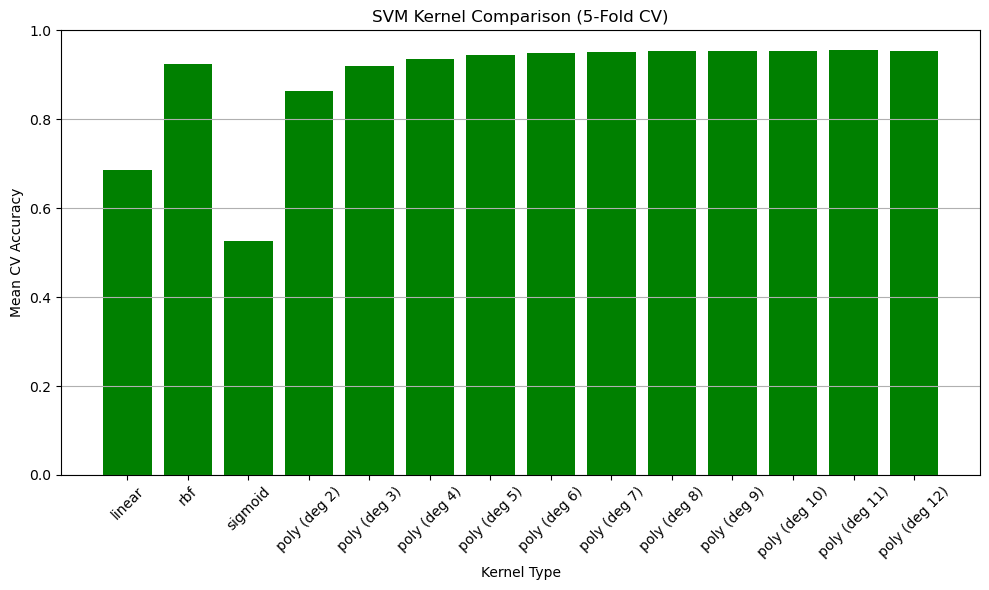

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(kernel_labels, cv_scores, color='green')
plt.xlabel("Kernel Type")
plt.ylabel("Mean CV Accuracy")
plt.title("SVM Kernel Comparison (5-Fold CV)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Analysis**

From the above chart, it is observed that the choice of kernel significantly affects the performance of the SVM model. Among all the kernels tested, the linear and sigmoid kernels perform the worst, while the RBF (Gaussian) and polynomial kernels achieve significantly higher accuracies.

The linear kernel performs poorly because it tries to separate the data using a flat hyperplane in high dimensions. However, this credit approval dataset likely involves complex and non-linear relationships between features like income, age, handphone usage, and family size. Furthermore, this data set also has a large number of features. As such, a linear boundary is too simple to accurately separate good and bad applicants.

The sigmoid kernel performs the worst among all the kernels tested, and this can be explained by the kind of decision boundary it tries to create. The sigmoid kernel tends to create mild S-shaped decision boundaries. This means it’s good at separating data that forms smooth, gradual transitions from one class to another like data shaped in a wave or S-curve. This complex dataset is unlikely to follow such a shape and hence resulted in a worse accuracy than the linear kernel.

The RBF (Gaussian) kernel performs significantly better. This kernel transforms the data into a higher-dimensional space, allowing the SVM to draw non-linear decision boundaries. It is highly effective in capturing the complex patterns in the data and adapting to curved or clustered distributions.

The polynomial kernels also consistently achieve high accuracy, with performance reaching a plateau from degree 4 onwards. Lower-degree polynomials can capture moderate non-linearity and higher degrees can allow for more complex boundaries. Increasing the polynomial degree beyond 4 offers diminishing returns, meaning the model is already complex enough to fit the data well. These results confirm that non-linear kernels are essential for this task and that both RBF and polynomial kernels are better suited than linear ones for capturing the hidden structure in credit approval data.

### Support Vector Machine (SVM) with Gaussian Kernel

In [20]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', coef0=1)
rbf_svm.fit(X_train_final, y_train.values.ravel())
y_pred_rbf = rbf_svm.predict(X_test_final)
y_scores_rbf = rbf_svm.decision_function(X_test_final)

print("Test Accuracy (Gaussian):", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

Test Accuracy (Gaussian): 0.8673889193636862

Confusion Matrix:
 [[  21   39]
 [ 928 6304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.35      0.04        60
           1       0.99      0.87      0.93      7232

    accuracy                           0.87      7292
   macro avg       0.51      0.61      0.49      7292
weighted avg       0.99      0.87      0.92      7292



In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rbf).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred_rbf, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred_rbf, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred_rbf, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred_rbf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rbf, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_rbf, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred_rbf, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_rbf, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_rbf, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_scores_rbf))
print("PR AUC:", average_precision_score(y_test, y_scores_rbf))

=== Confusion Matrix Derived Metrics ===
TPR: 0.8717, TNR: 0.3500, FPR: 0.6500, FNR: 0.1283

=== Micro-Averaged Metrics ===
Precision (micro): 0.8673889193636862
Recall (micro): 0.8673889193636862
F1 Score (micro): 0.8673889193636862

=== Macro-Averaged Metrics ===
Precision (macro): 0.507990023103221
Recall (macro): 0.6108407079646018
F1 Score (macro): 0.48519574291779144

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9858559637743476
Recall (weighted): 0.8673889193636862
F1 Score (weighted): 0.9214665469079167

=== Threshold-Based Metrics ===
ROC AUC: 0.6594280051622419
PR AUC: 0.9946951915766605


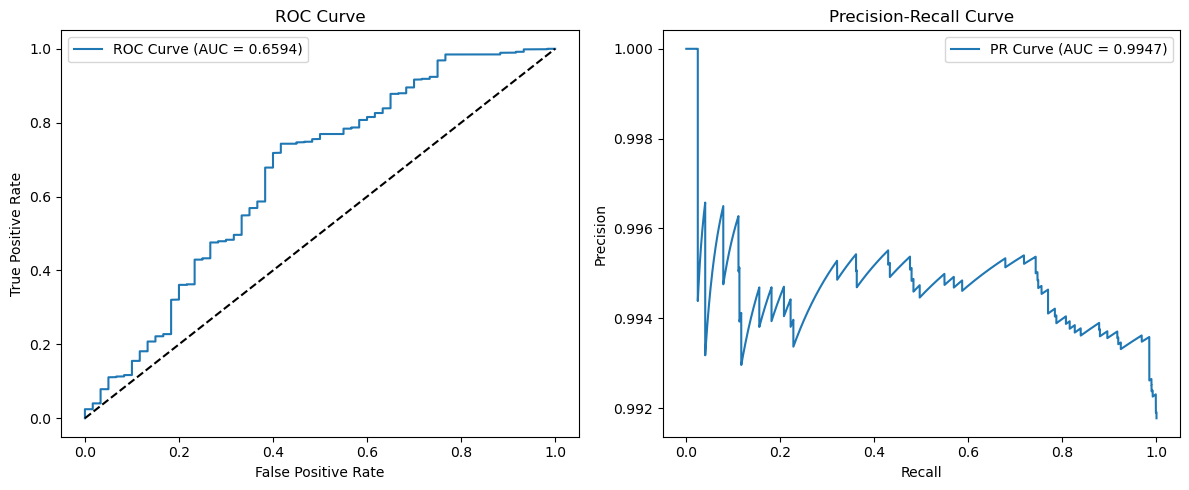

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_scores_rbf)
precision, recall, _ = precision_recall_curve(y_test, y_scores_rbf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_scores_rbf):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_scores_rbf):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**

1. Test Accuracy: 0.8674
    - This is significantly higher than random guessing, indicating that the model has successfully learned underlying patterns in the data. However, the high accuracy is largely driven by the majority class (class 1), and may not reflect true performance on minority class predictions.
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.02
            - Only 2% of the predicted class 0s are actually correct, suggesting that the model often misclassifies good clients as bad ones
        - Recall: 0.35
            - Captures 35% of actual bad clients, showing a notable improvement from the linear model but still misses most of them
        - F1-Score: 0.04
            - The harmonic mean of precision and recall still remains very low, showing a weak balance for class 0
    - Class 1 (Good Client):
        - Precision: 0.99
            - The model is very reliable when predicting a good client
        - Recall: 0.87
            - The model captures most of the actual good clients as only 13% are still misclassified as bad
        - F1-Score: 0.93
            - The score reflect a good balance between high precision and recall for the majority class
3. Averaged-Metrics
    - Micro-Average (All samples equally weighted): All metrics = 0.8674
        - As the task performed is binary classification, the micro-averaged scores are equivalent to accuracy
    - Macro-Average (All classes weighted equally): Precision: 0.51, Recall: 0.61, F1 Score: 0.49
        - The values show  more balanced view across both classes. These scores are much lower than micro and weighted averages, indicating that the model performs poorly on the minority class (class 0)
    - Weighted-Average (Each class weighted by its frequency): Precision: 0.99, Recall: 0.87, F1 Score: 0.92
        - High values here are driven by class 1 performance as it has a higher weight and obscures the poor prediction ability of class 0.
4. AUC-ROC: 0.6594
    The ROC AUC score is above 0.5, showing the model has some ability to distinguish between the two classes. However, the relatively low value suggests that there’s still room for improvement in discrimination capability
5. PR-AUC: 0.9947
    The PR AUC score is very high. Since class 1 is the majority class, it reflects how well the model is able to predict good clients
6. Confusion Matrix Derived Metrics: TPR: 0.8717, TNR: 0.35, FPR: 0.65, FNR: 0.128
    - These metrics shows that while the model performs well in identifying good clients, it still struggles to correctly reject bad clients, with a high false positive rate of 65%

**Why did it perform better than the linear model?**

The RBF (Gaussian) kernel SVM significantly outperforms the linear SVM because of its ability to model non-linear decision boundaries that better reflect the complex credit card approval data set. While the linear SVM attempts to separate the two classes using a single straight hyperplane, the approach is limited to datasets where classes are linearly separable, which is a condition that rarely holds true in real-world data.

The RBF kernel addresses this limitation by transforming the original input space into a higher-dimensional feature space, where it becomes easier to separate the data using a linear boundary in that new space. By transforming the original input space into a higher dimensional space allows the SVM to draw curved or flexible decision boundaries in the original space, which can adapt to the contours of the data classes more effectively. This is useful in credit card approvals, where  decisions depend on multiple interacting factors that do not separate cleanly in linear fashion. SVM with RBF kernel still aims to maximise the margin between classes while minimising classification errors. However, the RBF kernel allows this margin to wrap around the data in a way that better captures the structure of both the positive and negative classes. This leads to significantly improved recall for the majority class (0.87 vs. 0.59) and even moderate change in capturing the minority class (0.35 vs. 0.42).

The RBF kernel hence enables the SVM to learn more flexible and adaptable decision boundaries, improving generalisation and leading to better overall predictive performance in this task.

### Support Vector Machine (SVM) with Polynomial Kernel of Degree 11

In [23]:
poly_svm = SVC(kernel='poly', degree=11, C=1.0, gamma='scale', coef0=1)
poly_svm.fit(X_train_final, y_train.values.ravel())
y_pred_poly = poly_svm.predict(X_test_final)
y_scores_poly = poly_svm.decision_function(X_test_final)

print("Test Accuracy (Poly Degree 11):", accuracy_score(y_test, y_pred_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))

Test Accuracy (Poly Degree 11): 0.9589961601755348

Confusion Matrix:
 [[  19   41]
 [ 258 6974]]

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.32      0.11        60
           1       0.99      0.96      0.98      7232

    accuracy                           0.96      7292
   macro avg       0.53      0.64      0.55      7292
weighted avg       0.99      0.96      0.97      7292



In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_poly).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred_poly, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred_poly, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred_poly, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred_poly, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_poly, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_poly, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred_poly, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_poly, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_poly, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_scores_poly))
print("PR AUC:", average_precision_score(y_test, y_scores_poly))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9643, TNR: 0.3167, FPR: 0.6833, FNR: 0.0357

=== Micro-Averaged Metrics ===
Precision (micro): 0.9589961601755348
Recall (micro): 0.9589961601755348
F1 Score (micro): 0.9589961601755348

=== Macro-Averaged Metrics ===
Precision (macro): 0.5313737195437317
Recall (macro): 0.6404959439528024
F1 Score (macro): 0.5458863847436047

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9865396655531249
Recall (weighted): 0.9589961601755348
F1 Score (weighted): 0.9718854227591047

=== Threshold-Based Metrics ===
ROC AUC: 0.6781780051622419
PR AUC: 0.994318010614446


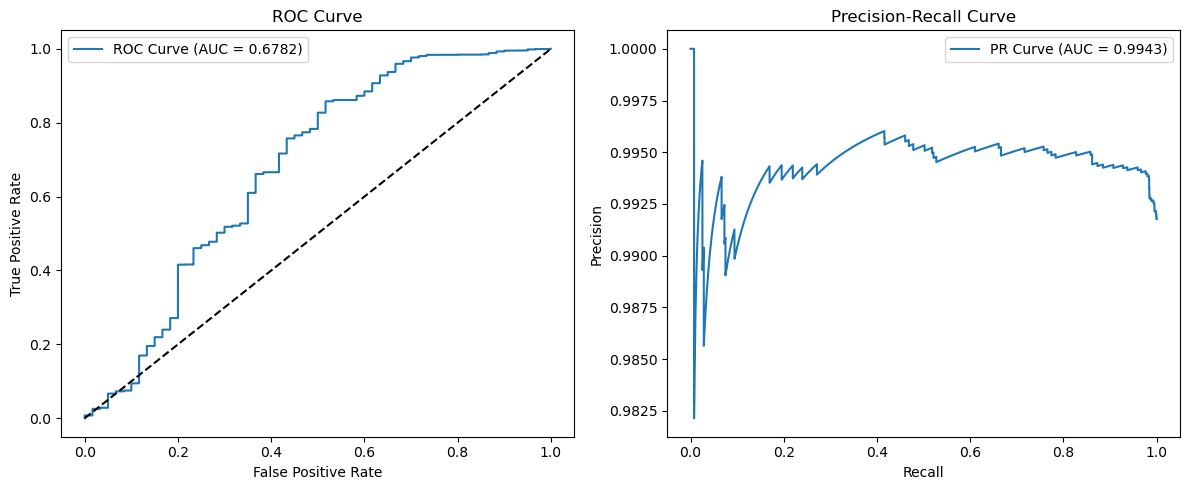

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_scores_poly)
precision, recall, _ = precision_recall_curve(y_test, y_scores_poly)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_scores_poly):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_scores_poly):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.9590
    - Exceptionally high and well above random guessing, this indicates the model is capturing strong patterns in the data. However, since this is an imbalanced dataset, accuracy alone is not sufficient to evaluate overall performance, especially regarding the reliability of detecting the minority class
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.07
            - Only 7% of predicted class 0s are actually correct. While this is low, it is the highest among all models tested so far, showing that this model is better at learning some characteristics of the minority class than the other models
        - Recall: 0.32
            - The model captures 32% of actual bad clients, slightly lower than the RBF model but significantly higher than the linear model
        - F1-Score: 0.11
            - Shows an improved score compared to earlier models, reflecting better balance between precision and recall, even though performance on this class is still not very ideal
    - Class 1 (Good Client):
        - Precision: 0.99
            - The model is highly accurate and reliable when predicting class 1
        - Recall: 0.96
            - Captures almost all actual good clients with only 3.6% false negatives, a significant improvement compared to RBF model
        - F1-Score: 0.98
            - Reflects a strong balance between high precision and high recall, this is the best value among all models tested
3. Averaged-Metrics
    - Micro-Average (All instances are equally weighted): All metrics = 0.9590
        - As the task performed is binary classification, the micro-averaged scores are equivalent to accuracy
    - Macro-Average (All classes are equally weighted): Precision: 0.53, Recall: 0.64, F1 Score: 0.55
        - These scores are a more balanced view across both classes. The improvement over previous models indicates better performance on both classes, especially for class 0.
    - Weighted-Average (Each class weighted by support): Precision: 0.99, Recall: 0.96, F1 Score: 0.97
        - The scores are very high but there is a need to take note that it is heavily influenced by the majority class
4. AUC-ROC: 0.6782
    - Higher than both the linear and RBF model, hence indicating better discriminative ability between classes than the other models
5. PR-AUC: 0.9943
    - Very high, showing that the model maintains strong precision across a range of recall values. However, this metric is heavily skewed by the dominance of the positive class
6. Confusion Matrix Derived Metrics: TPR: 0.9643, TNR: 0.3167, TPR: 0.6833, FNR: 0.0357
The model is good at correctly identifying good clients (class 1), with very few false negatives. But its ability to reject bad clients (class 0) is still limited but shows a noticeable improvement over all other models tested so far.

**Why did it perform better than the linear model?**

The reason why polynomial kernel SVM significantly outperforms the linear SVM is the same reason as why the RBF (Gaussian) kernel SVM outperforms linear SVM. It because of its ability to model non-linear decision boundaries that better reflect the complex credit card approval data set. Whereas the linear SVM attempts to separate the two classes using a single straight hyperplane, the approach is limited to datasets where classes are linearly separable, which is a condition that rarely holds true in real-world data.

The polynomial kernel hence enables the SVM to learn more flexible and adaptable decision boundaries, improving generalisation and leading to better overall predictive performance in this task.

**Why did it perform better than the RBF (Gaussian) Kernel SVM?**

Although both the RBF (Gaussian) and Polynomial kernels are non-linear transformations used in SVM to allow for flexible decision boundaries. However, their mathematical properties and the way they map data differ significantly which helps explain why the Polynomial kernel (degree 11) performs better in this task. The RBF (Gaussian) kernel maps data into an infinite-dimensional space using Gaussian functions centered around each training point. It creates smooth, circular decision boundaries, ideal for separating local clusters of data. The Polynomial kernel, on the other hand, maps the input data into a high-degree polynomial feature space, enabling the model to form globally complex and waby boundaries with extreme curvature that resemble ridges in higher dimensions.

In this case, it is likely that the credit approval dataset contains highly non-linear relationships that span across multiple features simultaneously. The degree-11 polynomial kernel is capable of capturing these intricate global interactions, while the RBF kernel may be limited by its emphasis on local structure. The RBF kernel is smooth and controls complexity using the gamma parameter that governs how far a single data point influences the decision boundary. While this works well in moderately non-linear settings, it may underfit if the data has sharp transitions or complex feature combinations. The Polynomial kernel, on the other hand, at higher degrees, can represent highly intricate patterns by considering interactions between multiple features at various degrees of combination. This makes it more powerful for modeling complicated relationships.

In the above models, the polynomial kernel achieved higher recall (0.96 vs. 0.87), higher test accuracy (0.96 vs. 0.87), and a better ROC AUC (0.678 vs. 0.659). Overall, the polynomial kernel outperforms RBF because it better captures the global, high-order feature interactions that drive credit card approval decisions. While RBF excels in problems with locally clustered class structures, the polynomial kernel’s ability to model complex decision boundaries at a global level gives it the edge in various performance metrics.

**Further Improvement**
- Perform a thorough grid search or randomized search to find the optimal combination of regularisation strength (C) and polynomial offset (coef0) to improve generalization and reduce overfitting

### Hyperparameter Tuning for SVM with Polynomial Kernel of Degree 11

In [26]:
C_values = [0.1, 1.0, 5.0]
coef0_values = [0, 0.5, 1]

for c in C_values:
    for coef in coef0_values:
        model = SVC(kernel='poly', degree=11, C=c, coef0=coef, gamma='scale')
        scores = cross_val_score(model, X_train_final, y_train.values.ravel(), cv=5, scoring='accuracy')
        mean_score = scores.mean()
        print(f"[INFO] C={c}, coef0={coef} => Mean CV Accuracy: {mean_score:.4f}")

[INFO] C=0.1, coef0=0 => Mean CV Accuracy: 0.9314
[INFO] C=0.1, coef0=0.5 => Mean CV Accuracy: 0.9648
[INFO] C=0.1, coef0=1 => Mean CV Accuracy: 0.9721
[INFO] C=1.0, coef0=0 => Mean CV Accuracy: 0.9551
[INFO] C=1.0, coef0=0.5 => Mean CV Accuracy: 0.9718
[INFO] C=1.0, coef0=1 => Mean CV Accuracy: 0.9744
[INFO] C=5.0, coef0=0 => Mean CV Accuracy: 0.9655
[INFO] C=5.0, coef0=0.5 => Mean CV Accuracy: 0.9742
[INFO] C=5.0, coef0=1 => Mean CV Accuracy: 0.9752


**Analysis**

The grid search across different combinations of C and coef0 for the polynomial kernel SVM reveals a consistent trend that higher values of both C and coef0 lead to better cross-validation (CV) accuracy. These results suggest that increasing both parameters improves the model's ability to fit the training data. However, the improvements become marginal at higher values. For example, increasing coef0 from 0.5 to 1 when C=5.0 results in a mere 0.001 gain in mean CV accuracy, indicating diminishing returns when increasing the values of the hyperparameters. 

There had been intentions to identify the combination of hyperparameter values that causes the cross-validation score to peak but the computational time starts to be exponentially long beyond C=5.0 and coef0=1. This is because the polynomial kernel computes the similarity between data points as $K(x_i, x_j) = (\ x_i^\top x_j + \text{coef0})^d$. With a high degree of 11 and larger values of coef0, the kernel values become very large and expand the feature space dramatically, making computations more intensive. A higher value of C tightens the margin by penalising classification errors more strictly, causing the optimisation process to solve a more constrained and complex programming problem with more support vectors and tighter tolerances. Together, these lead to higher memory consumption, numerical instability and longer convergence time during optimisation. Early stopping will be employed to limit training time. We will use C=5.0 and coef0=1 as it has the best cross-validation score.

In [27]:
poly_svm2 = SVC(kernel='poly', degree=11, C=5.0, gamma='scale', coef0=1)
poly_svm2.fit(X_train_final, y_train.values.ravel())
y_pred_poly2 = poly_svm2.predict(X_test_final)
y_scores_poly2 = poly_svm2.decision_function(X_test_final)

print("Test Accuracy (Poly Degree 11):", accuracy_score(y_test, y_pred_poly2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly2))

Test Accuracy (Poly Degree 11): 0.9655787164015359

Confusion Matrix:
 [[  20   40]
 [ 211 7021]]

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.33      0.14        60
           1       0.99      0.97      0.98      7232

    accuracy                           0.97      7292
   macro avg       0.54      0.65      0.56      7292
weighted avg       0.99      0.97      0.98      7292



In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_poly2).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred_poly2, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred_poly2, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred_poly2, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred_poly2, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_poly2, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_poly2, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred_poly2, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred_poly2, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_poly2, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_scores_poly2))
print("PR AUC:", average_precision_score(y_test, y_scores_poly2))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9708, TNR: 0.3333, FPR: 0.6667, FNR: 0.0292

=== Micro-Averaged Metrics ===
Precision (micro): 0.9655787164015359
Recall (micro): 0.9655787164015359
F1 Score (micro): 0.9655787164015359

=== Macro-Averaged Metrics ===
Precision (macro): 0.5404575832985407
Recall (macro): 0.6520787241887905
F1 Score (macro): 0.559948000402956

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.98686589466233
Recall (weighted): 0.9655787164015359
F1 Score (weighted): 0.9754862799547079

=== Threshold-Based Metrics ===
ROC AUC: 0.6735826880530975
PR AUC: 0.9941733689161343


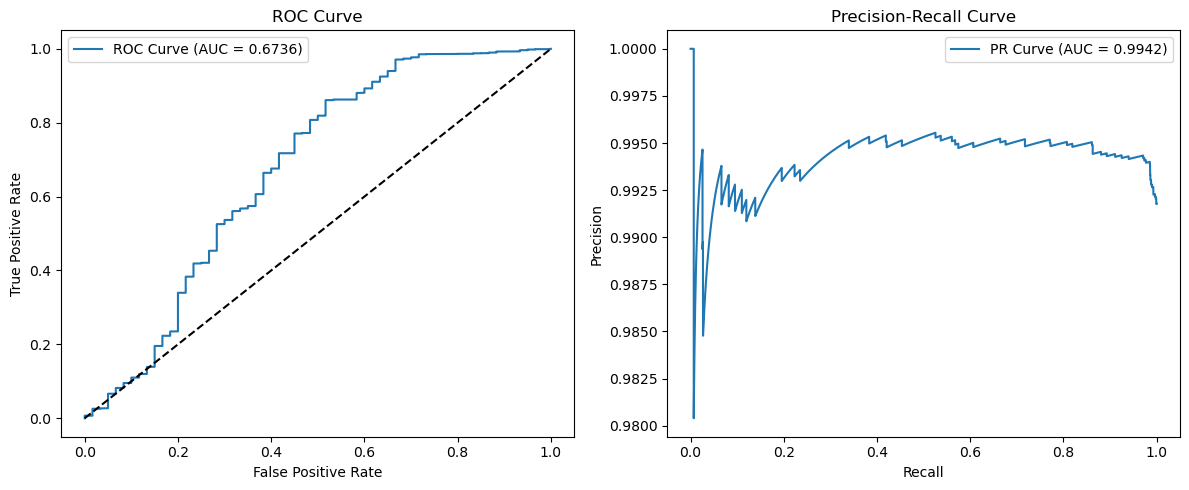

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_scores_poly2)
precision, recall, _ = precision_recall_curve(y_test, y_scores_poly2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_scores_poly2):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_scores_poly2):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.9656
    - Exceptionally high and better than all the previous models. This indicates the model has managed to captured complex relationships in the data. However, accuracy alone should be interpreted cautiously due to class imbalance.
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.09
            - While the precision is still rather low, this is the highest precision for class 0 observed so far with 9% of predicted class 0s are correctly classified
        - Recall: 0.33
            - The model correctly identifies 33% of actual bad clients, which is on par with previous bests. There is still a high value of false positives
        - F1-Score: 0.14
            - While this score is not the most ideal, it shows the best trade-off between precision and recall for class 0 among all SVM models thus far
    - Class 1 (Good Client):
        - Precision: 0.99
            - High value shows extremely high reliability in classifying good clients
        - Recall: 0.97
            - Nearly all actual good clients are identified, with minimal false negatives
        - F1-Score: 0.98
            - Shows excellent balance between high precision and recall
3. Averaged-Metrics
    - Micro-Average (All instances weighted equally): All metrics = 0.9656
        - As the task performed is binary classification, the micro-averaged scores are equivalent to accuracy
    - Macro-Average (All classes weighted equally): Precision: 0.54, Recall: 0.65, F1 Score: 0.56
        - A balanced view showing moderate improvement for minority class handling compared to previous models. It has the best macro F1 score among all SVM configurations so far, indicating better balanced performance across both classes
    - Weighted-Average (Each class weighted by support): Precision: 0.99, Recall: 0.97, F1 Score: 0.98
        These high values largely reflect performance on the majority class but it serves to confirm the strong reliability in predicting class 1
4. AUC-ROC: 0.6736
    - Shows slight improvement over RBF and previous polynomial model. This confirms improved class separation.
5. PR-AUC: 0.9942
    - Very high precision-recall curve area, which also reflects excellent handling of the majority class, though this metric is inflated due to class imbalance
6. Confusion Matrix Derived Metrics: TPR: 0.9708, TNR: 0.3333, FPR: 0.6667, FNR: 0.0292
    - The model has a good ability to correctly classify good clients with a very low FNR. However, the TNR remains moderate, indicating room for improvement in detecting bad clients

**Why this model performs better than the untuned model?**
- Increased value of C makes the margin stricter. The parameter C controls the trade-off between maximising the margin and minimising classification error. A larger C=5.0 places greater penalty on misclassifications, encouraging the model to fit the training data more tightly.
This reduces the softness of the margin and results in a narrower margin with fewer violations, allowing the model to capture finer distinctions, particularly in complex, overlapping regions of the data. Compared to C=1.0, this higher value helps the SVM correct more of the borderline mistakes made previously, leading to higher recall and precision for class 0.
- Increasing coef0 increases the influence of lower-order polynomial terms (like linear and bias terms) in the expansion. A higher coef0=1 compared to coef0=0 or 0.5 encourages the model to leverage both simple and complex feature interactions, rather than focusing solely on high dimensional components. This results in a more balanced feature mapping, improving class separation without over-relying on extreme high dimensional interactions.

The combination of high C and higher coef0 leads to a well-balanced boundary that is both flexible enough to fit the complex boundary between approved and rejected clients and constrained enough to generalise well across folds and avoid overfitting noise. This is reflected in improved macro F1 score (0.56), ROC AUC (0.6736), and reduced false negatives, making this the most balanced model across both classes.

### Adjusting Threshold for Classification

In [31]:
poly_svm = SVC(kernel='poly', degree=11, C=5.0, gamma='scale', coef0=1.0)
poly_svm.fit(X_train_final, y_train.values.ravel())

decision_scores = poly_svm.decision_function(X_test_final)
thresholds = np.linspace(min(decision_scores), max(decision_scores), 200)

results = {
    'threshold': [],
    'recall_0': [],
    'recall_1': [],
    'precision_0': [],
    'precision_1': [],
    'f1_0': [],
    'f1_1': [],
    'recall_diff': []
}

for t in thresholds:
    y_pred = (decision_scores > t).astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0

    precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
    precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0

    f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

    recall_diff = abs(recall_0 - recall_1)

    results['threshold'].append(t)
    results['recall_0'].append(recall_0)
    results['recall_1'].append(recall_1)
    results['precision_0'].append(precision_0)
    results['precision_1'].append(precision_1)
    results['f1_0'].append(f1_0)
    results['f1_1'].append(f1_1)
    results['recall_diff'].append(recall_diff)

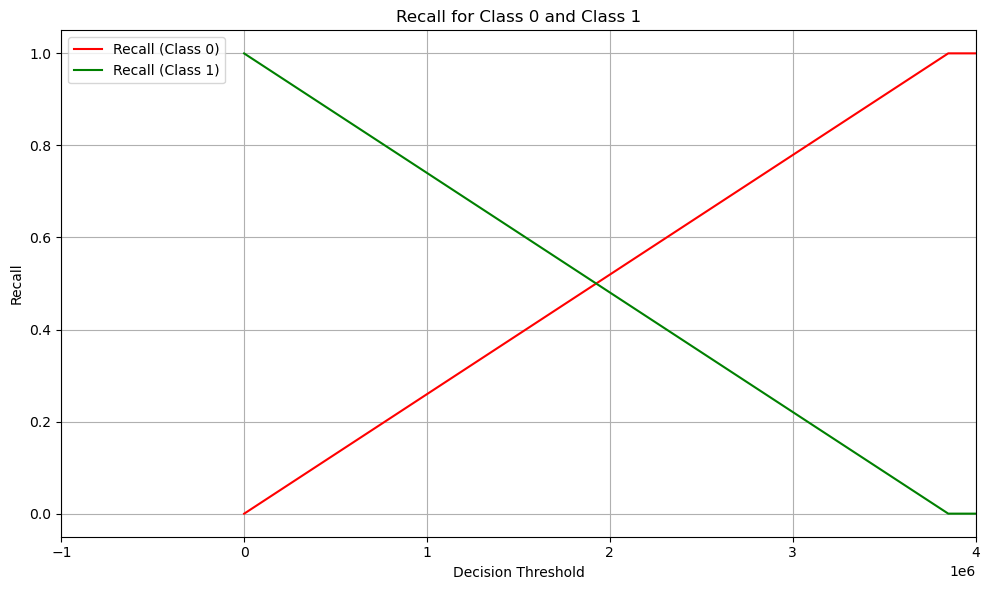

In [33]:
df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(df['threshold'], df['recall_0'], label='Recall (Class 0)', color='red')
plt.plot(df['threshold'], df['recall_1'], label='Recall (Class 1)', color='green')
plt.xlabel("Decision Threshold")
plt.ylabel("Recall")
plt.title("Recall for Class 0 and Class 1")
plt.xlim(-1000000,4000000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis**

The plot shows how the recall for Class 0 (bad clients) and Class 1 (good clients) changes with different decision thresholds. As the threshold increases, the recall for Class 0 (red line) increases, while the recall for Class 1 (green line) decreases. By shifting the threshold higher, the model becomes more conservative in predicting Class 1, which reduces false positives for Class 0 and increases its recall. However, this comes at the cost of missing more actual Class 1 instances, hence lowering its recall. The trade-off reflected here shows the importance of threshold tuning in imbalanced datasets. Threshold tuning depends on the application goal (such as to reduce false approvals or minimise false rejections). Depending on which goal is more important, the financial institution can select a threshold that balances both recalls or favors one class over the other. This is especially important in credit card approval tasks, where false negatives (misclassifying good clients as bad) or false positives (approving risky clients) carry different real-world costs.

## 3. Conclusion

**Summary**

In this notebook, we evaluated the performance of different SVM models including linear, RBF, sigmoid, and polynomial kernels for the task of credit card approval prediction. The analysis covered standard evaluation metrics such as accuracy and F1 score, and also deeper insights through class-wise recall, AUC scores, and decision threshold behavior.

The linear and sigmoid kernels were found to be inadequate due to their inability to capture the complex, non-linear relationships in the data. The RBF (Gaussian) kernel significantly improved class 1 performance but struggled to recall the minority class (class 0). Through progressive tuning, the polynomial kernel (degree 11) consistently outperformed other kernels by better balancing complexity and decision boundary flexibility.

Among all the configurations, the best-performing model was the Polynomial SVM with degree 11, C=5.0, and coef0=1, achieving a test accuracy of 96.6%, a class 1 recall of 0.97, and the highest macro-averaged F1 score across all models. Importantly, it also has the best trade-off between the majority and minority class performance, making it the most robust and reliable model for deployment in real-world credit approval settings where both over-approval and under-approval have significant consequences.

**Future Improvements**
- Extended hyperparameter tuning
    - Should there be no time constraint, it is possible to explore a wider grid or use randomized search over C, coef0, gamma, and degree for the polynomial kernel if computation allows
- Threshold optimization
    - Use precision-recall and ROC-based analysis to select an operating threshold that balances recall for both classes, or prioritizes class 0 depending on a more specific goal
- Cost sensitive learning
    - Incorporate different misclassification costs to penalize false positives or false negatives more heavily, aligned with real world business impact
- Model ensembling
    - Combine polynomial SVM with other models (e.g. decision trees, logistic regression) using a stacking approach to increase robustness of the model